# EDA notebook

## Importing the Data

In [9]:
import pandas as pd
import numpy as np
import sqlite3
import data_preparation as dp
import matplotlib.pyplot as plt

bom_cleaned = pd.read_csv("../data/bom.movie_gross.csv.gz")
conn = sqlite3.connect("../data/im.db")

In [10]:
bom_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [11]:
# for table_name in imdb_tables:
#     df = pd.read_sql(f"SELECT * from {table_name[0]}", conn)
#     print(f"Table: {table_name[0]}")
#     print(df.info(),"\n")

## GENRE VS RATING

In [12]:
genre_vs_rating=pd.read_sql('''
SELECT b.genres, avg(r.averagerating) as average_rating
FROM movie_basics b
	JOIN movie_ratings r
	USING (movie_id)
GROUP BY genres;'''
, conn)
genre_vs_rating.head(20)
genre_vs_rating.iloc[:,:1].head()

,genres
0,None
1,Action
2,"Action,Adult,Comedy"
3,"Action,Adventure"
4,"Action,Adventure,Animation"


## GENRE VS GROSS

In [13]:
# genre=pd.read_sql('''
# SELECT primary_title as 'title', genres
# FROM movie_basics
# ;'''
# , conn)
# pd.get_dummies(genre['genres'])
# df[['First Name', 'Last Name']] = df.Student_details.str.split(",", expand = True)

In [14]:
df = bom_cleaned.merge(genre,how='inner',on='title')

## GENRE VS GROSS & BUDGET

## BUDGET VS GROSS

## WRITER VS GROSS

## DIRECTOR VS GROSS OR RATING

## RATED (R, M, PG, PG13) vs RATING (Popularity)

In [15]:
rt = pd.read_csv("../data/rt_cleaned_combined.csv")

In [16]:
ratings = rt.groupby('rated',as_index=False)['new_rating'].mean()
ratings

,rated,new_rating
0,G,0.660845
1,NR,0.672566
2,PG,0.591437
3,PG-13,0.564879
4,R,0.600617


''

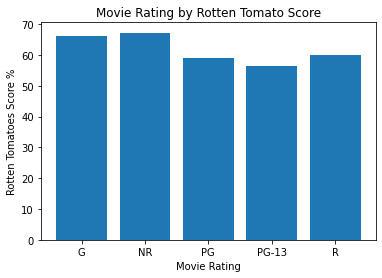

In [17]:
fig, ax = plt.subplots()

ax.bar(x=ratings['rated'], height = ratings['new_rating']*100)
ax.set_ylabel('Rotten Tomatoes Score %')
ax.set_xlabel('Movie Rating')
ax.set_title("Movie Rating by Rotten Tomato Score")
;

## RUNTIME VS GROSS/RATING (LOOK BY GENRE)

In [26]:
imdb_gross = pd.read_csv('df_imdb_w_fin.csv')
imdb_gross.head()

,Unnamed: 0,movie_id,primary_title,start_year,runtime_minutes,genres,title_merge_x,release_date,movie,production_budget,domestic_gross,worldwide_gross,title_merge_y
0,0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",sunghursh,NaN,NaN,NaN,NaN,NaN,NaN
1,1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",onedaybeforetherainyseason,NaN,NaN,NaN,NaN,NaN,NaN
2,2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,theothersideofthewind,NaN,NaN,NaN,NaN,NaN,NaN
3,3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",sabsebadasukh,NaN,NaN,NaN,NaN,NaN,NaN
4,4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",thewanderingsoapopera,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
gross_runtime = imdb_gross.loc[(imdb_gross['domestic_gross'] > 0) & (imdb_gross['runtime_minutes'] > 0), ['primary_title', 'runtime_minutes', 'domestic_gross', 'worldwide_gross']]
gross_runtime

,primary_title,runtime_minutes,domestic_gross,worldwide_gross
38,Wazir,103.0,1100000.0,1100000.0
40,The Overnight,88.0,1109808.0,1165996.0
48,On the Road,124.0,744000.0,8744000.0
49,On the Road,124.0,720828.0,9313302.0
55,The Secret Life of Walter Mitty,114.0,58200000.0,188100000.0
...,...,...,...,...
147484,The Hunt,90.0,613000.0,613000.0
147521,Ali,110.0,58183966.0,87683966.0
147809,Columbus,85.0,1017107.0,1110511.0
147862,Unstoppable,84.0,81600000.0,167800000.0


In [38]:
np.corrcoef(gross_runtime.runtime_minutes, gross_runtime.domestic_gross)

array([[1.        , 0.10261223],
       [0.10261223, 1.        ]])

In [77]:
np.corrcoef(gross_runtime.runtime_minutes, gross_runtime.worldwide_gross)

array([[1.        , 0.12659764],
       [0.12659764, 1.        ]])

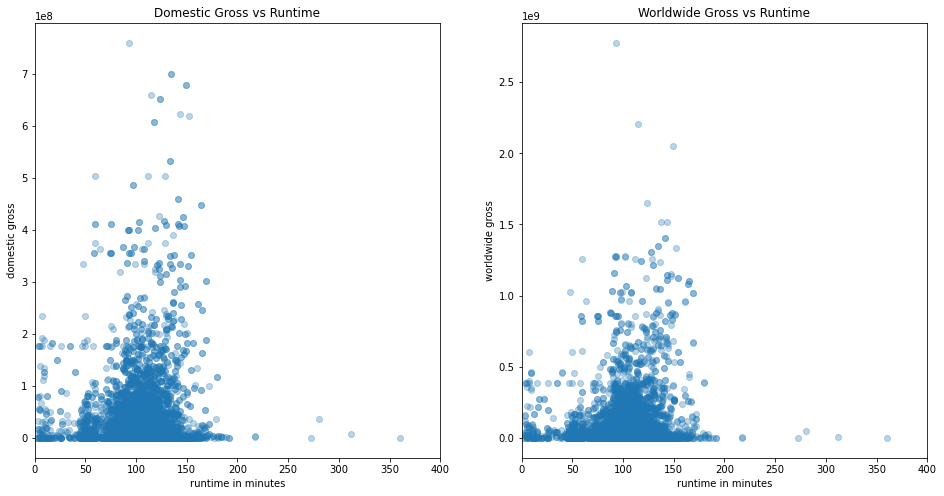

''

In [71]:
fig, (ax1, ax2) = plt.subplots(figsize=(16,8), ncols=2)

ax1.scatter(x=gross_runtime.runtime_minutes, y=gross_runtime.domestic_gross, alpha = .3)
ax1.set_xlabel('runtime in minutes')
ax1.set_ylabel('domestic gross')
ax1.set_title('Domestic Gross vs Runtime')
ax1.set_xlim(0,400)

ax2.scatter(x=gross_runtime.runtime_minutes, y=gross_runtime.worldwide_gross, alpha = .3)
ax2.set_title("Worldwide Gross vs Runtime")
ax2.set_xlabel('runtime in minutes')
ax2.set_ylabel('worldwide gross')
ax2.set_xlim(0,400)

plt.show()
;


## RATING(good vs bad) VS GROSS	

In [41]:
imdb_ratings = pd.read_sql('''
SELECT b.primary_title, r.averagerating
FROM movie_basics b
    JOIN movie_ratings r
    ON b.movie_id = r.movie_id
WHERE r.numvotes > 100    
;'''
, conn)

In [43]:
gross_ratings = imdb_gross.merge(imdb_ratings,
                how = 'inner',
                on = 'primary_title')

In [44]:
gross_ratings.head()

,Unnamed: 0,movie_id,primary_title,start_year,runtime_minutes,genres,title_merge_x,release_date,movie,production_budget,domestic_gross,worldwide_gross,title_merge_y,averagerating
0,2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,theothersideofthewind,NaN,NaN,NaN,NaN,NaN,NaN,6.9
1,4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",thewanderingsoapopera,NaN,NaN,NaN,NaN,NaN,NaN,6.5
2,7,tt0137204,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",joefindsgrace,NaN,NaN,NaN,NaN,NaN,NaN,8.1
3,10,tt0146592,Pál Adrienn,2010,136.0,Drama,páladrienn,NaN,NaN,NaN,NaN,NaN,NaN,6.8
4,13,tt0162942,Children of the Green Dragon,2010,89.0,Drama,childrenofthegreendragon,NaN,NaN,NaN,NaN,NaN,NaN,6.9


In [73]:
gr_filtered = gross_ratings.loc[ (gross_ratings['averagerating'] > 0) & (gross_ratings['domestic_gross'] > 0), ['primary_title', 'averagerating', 'domestic_gross', 'worldwide_gross']]
gr_filtered

,primary_title,averagerating,domestic_gross,worldwide_gross
19,Wazir,7.1,1100000.0,1100000.0
21,The Overnight,6.1,1109808.0,1165996.0
22,The Overnight,6.1,1109808.0,1165996.0
25,On the Road,6.1,744000.0,8744000.0
26,On the Road,5.7,744000.0,8744000.0
...,...,...,...,...
39910,Helicopter Eela,5.4,72000.0,72000.0
40026,Fahrenheit 11/9,6.7,6352306.0,6653715.0
40259,Unplanned,6.3,18107621.0,18107621.0
40282,Last Letter,6.4,181000.0,181000.0


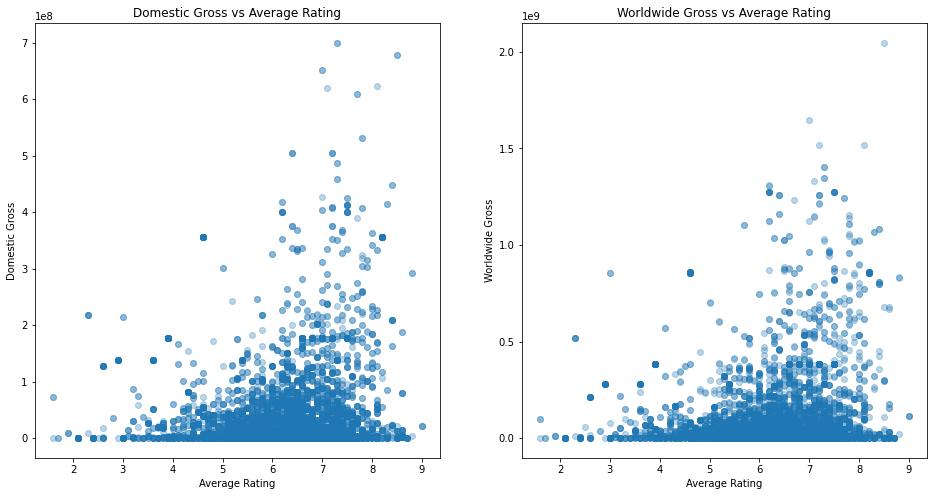

''

In [74]:
fig, (ax1, ax2) = plt.subplots(figsize=(16,8), ncols=2)

ax1.scatter(x=gr_filtered.averagerating, y=gr_filtered.domestic_gross, alpha = .3)
ax1.set_xlabel('Average Rating')
ax1.set_ylabel('Domestic Gross')
ax1.set_title('Domestic Gross vs Average Rating')

ax2.scatter(x=gr_filtered.averagerating, y=gr_filtered.worldwide_gross, alpha = .3)
ax2.set_title("Worldwide Gross vs Average Rating")
ax2.set_xlabel('Average Rating')
ax2.set_ylabel('Worldwide Gross')


plt.show()
;

In [78]:
np.corrcoef(gr_filtered.averagerating, gr_filtered.domestic_gross)

array([[1.        , 0.10498034],
       [0.10498034, 1.        ]])

In [79]:
np.corrcoef(gr_filtered.averagerating, gr_filtered.worldwide_gross)

array([[1.        , 0.11605747],
       [0.11605747, 1.        ]])

In [1]:
import seaborn as sns

In [ ]:
sns.regplot(x = df_imdb_tn_trimmed['runtime_minutes'], y = df_imdb_tn_trimmed['worldwide_gross'], marker = '*',
            scatter_kws={"color":"darkred","alpha":0.1,"s":20}, fit_reg = False)
change x, y, and fit_reg = True